In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scripts.functions import *

In [2]:
file = 'results/wbf-2023-05-25.tar.gz'
df_nyc = pd.read_csv(file)
df_nyc['dataset'] = 'NYC'
df_nyc['mi_actual'] = np.maximum(0, df_nyc['mi_actual'])
df_nyc = compute_additional_columns(df_nyc)

file = 'results/nyc-2023-05-25.tar.gz'
df_wbf = pd.read_csv(file)
df_wbf['dataset'] = 'WBF'
df_wbf['mi_actual'] = np.maximum(0, df_wbf['mi_actual'])
df_wbf = compute_additional_columns(df_wbf)

file = 'results/mnl-2023-07-12.csv.zip'
df_mnl = pd.read_csv(file)
df_wbf['dataset'] = 'MNL'
df_mnl['mi_dist'] = df_mnl['true_mi'] # In synthetic data files, the analytical MI is in the true_mi 
df_mnl = compute_additional_columns(df_mnl)

file = 'results/cdu-2023-06-07.csv.zip'
df_cdu = pd.read_csv(file)
df_wbf['dataset'] = 'CDU'
df_cdu['mi_dist'] = df_cdu['true_mi']
df_cdu = compute_additional_columns(df_cdu)

In [3]:
import os
figures_path = './paper-figures'
os.makedirs(figures_path, exist_ok = True)

## Experiments using Synthetic Data

WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.


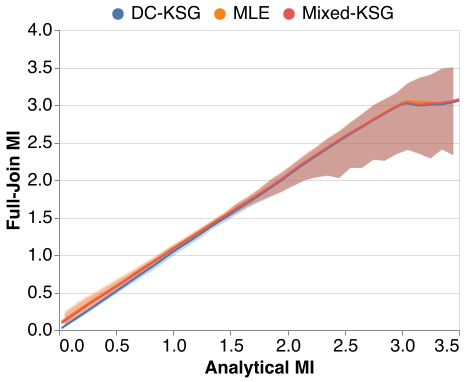

In [4]:
df_plot = df_mnl.copy(deep=True).drop_duplicates(subset=['columnId'])
save_alt(
  loess_with_error_chart(
    df_plot, 
    x='mi_dist', x_title="Analytical MI",
    y='mi_actual',  y_title="Full-Join MI",
    color='estimator',
  ).configure_legend(
    orient='none',
    titleFontSize=18,
    labelFontSize=18,
    titleAnchor='middle',
    direction='horizontal',
    legendX=50,
    legendY=-25,
    symbolOpacity=1,
    title=None,
    labelLimit=0,
  ).configure_axis(
    labelFontSize=18,
    titleFontSize=18,
  ).configure_title(
    fontSize=20,
  ),
  filename=f'{figures_path}/figure-analytical-vs-fulljoin-smn.pdf',
)

WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.


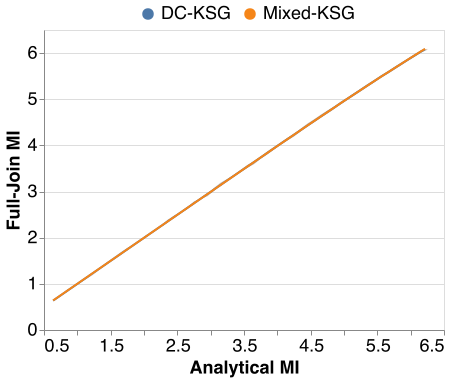

In [5]:
df_plot = df_cdu.copy(deep=True).drop_duplicates(subset=['columnId'])
df_plot = df_plot[df_plot['estimator'] != 'MLE']
save_alt(
  loess_with_error_chart(
    df_plot, 
    x='mi_dist', x_title="Analytical MI",
    y='mi_actual',  y_title="Full-Join MI",
    color='estimator',
  ).configure_legend(
    orient='none',
    titleFontSize=18,
    labelFontSize=18,
    titleAnchor='middle',
    direction='horizontal',
    legendX=95,
    legendY=-25,
    symbolOpacity=1,
    title=None,
    labelLimit=0,
  ).configure_axis(
    labelFontSize=18,
    titleFontSize=18,
  ).configure_title(
    fontSize=20,
  ),
  filename=f'{figures_path}/figure-analytical-vs-fulljoin-cdu.pdf',
)

WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.


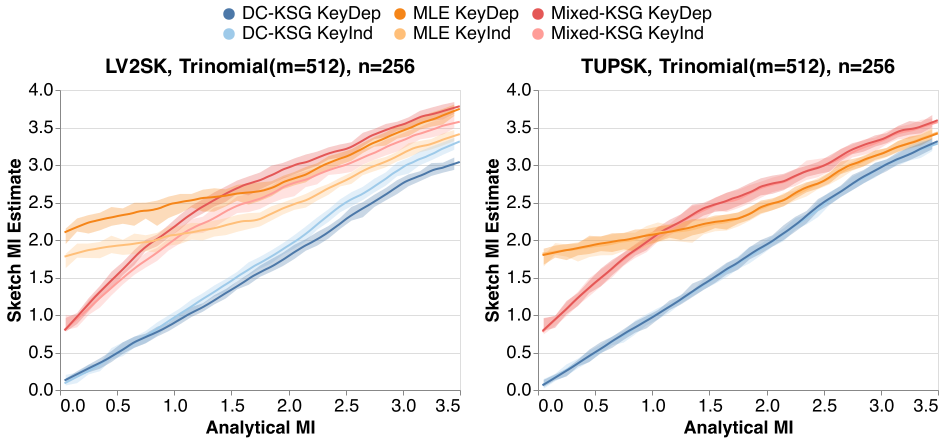

In [6]:
df_plot = df_mnl.copy(deep=True)
df_plot['legend'] = df_plot['estimator'] + ' ' + df_plot['key_dist']

plot_filters = [
  (df_plot['sketch_type'] == 'LV2SK', 512, 'LV2SK'),
  (df_plot['sketch_type'] == 'TUPSK', 512, 'TUPSK'),
]

sketch_n = '256'
multinomial_n = 512

# Custom color scaled based on the tableau20 colors:
# ['4c78a8','9ecae9','f58518','ffbf79','54a24b','88d27a','b79a20','f2cf5b','439894','83bcb6','e45756',
#  'ff9d98','79706e','bab0ac','d67195','fcbfd2','b279a2','d6a5c9','9e765f','d8b5a5']
scale = alt.Scale(domain=['DC-KSG KeyDep', 'DC-KSG KeyInd', 'MLE KeyDep', 'MLE KeyInd', 'Mixed-KSG KeyDep', 'Mixed-KSG KeyInd'],
                  range=['#4c78a8', '#9ecae9', '#f58518', '#ffbf79', '#e45756', '#ff9d98'])

plots = [
  loess_with_error_chart(
    df_plot[(f & (df_plot.multinomial_n == multinomial_n) & (df_plot.sketch_n == sketch_n))],
    x='mi_dist', x_title='Analytical MI',
    y='mi_est',  y_title='Sketch MI Estimate',
    # color='legend',
    color=(alt.Color('legend:N', scale=scale), 'legend',),
    chart_title=f'{sketch_label}, Trinomial(m={multinomial_n}), n={sketch_n}',
  ) for f, multinomial_n, sketch_label in plot_filters
]
save_alt(
  scatter_hconcat_chart(plots, legendX=0, legendY=-80).configure_legend(
    orient='none',
    titleFontSize=18,
    labelFontSize=18,
    titleAnchor='middle',
    direction='vertical',
    legendX=160,
    legendY=-85,
    columns=3,
    symbolOpacity=1,
    title=None,
    labelLimit=0,
  ),
  filename=f'{figures_path}/figure4.pdf'
)

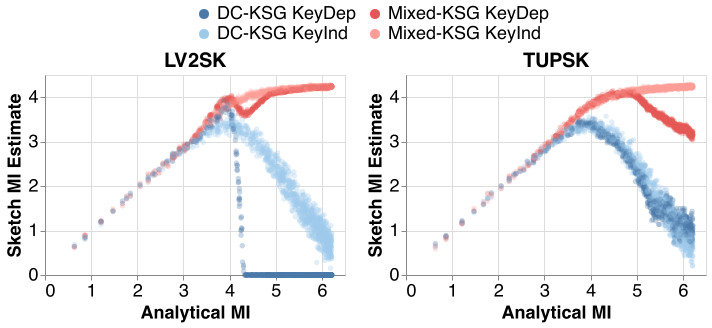

In [7]:
df_plot = df_cdu.copy(deep=True)
df_plot = df_plot[df_plot['estimator'] != 'MLE']
df_plot['legend'] = df_plot['estimator'] + ' ' + df_plot['key_dist']

x=('mi_dist', 'Analytical MI')
y=('mi_est', 'Sketch MI Estimate')

plot_filters = [
  (df_plot['sketch_type'] == 'LV2SK', 'LV2SK'),
  (df_plot['sketch_type'] == 'TUPSK', 'TUPSK'),
]

scale = alt.Scale(domain=['DC-KSG KeyDep', 'DC-KSG KeyInd', 'Mixed-KSG KeyDep', 'Mixed-KSG KeyInd'],
                  range=['#4c78a8', '#9ecae9', '#e45756', '#ff9d98'])

plots = [
    scatter_alt(
        df_plot[f & (df_plot.sketch_n == '256')],
        x=x[0], x_title=x[1],
        y=y[0], y_title=y[1],
        color=alt.Color('legend:N', scale=scale),
        chart_title=label,
    )
    for f, label in plot_filters]

save_alt(  
  scatter_hconcat_chart(plots, legendX=0, legendY=-80).configure_legend(
    orient='none',
    titleFontSize=18,
    labelFontSize=18,
    titleAnchor='middle',
    direction='vertical',
    legendX=150,
    legendY=-70,
    columns=2,
    symbolOpacity=1,
    title=None,
    labelLimit=0,
  ),
  filename=f'{figures_path}/figure5.pdf'
)

WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.


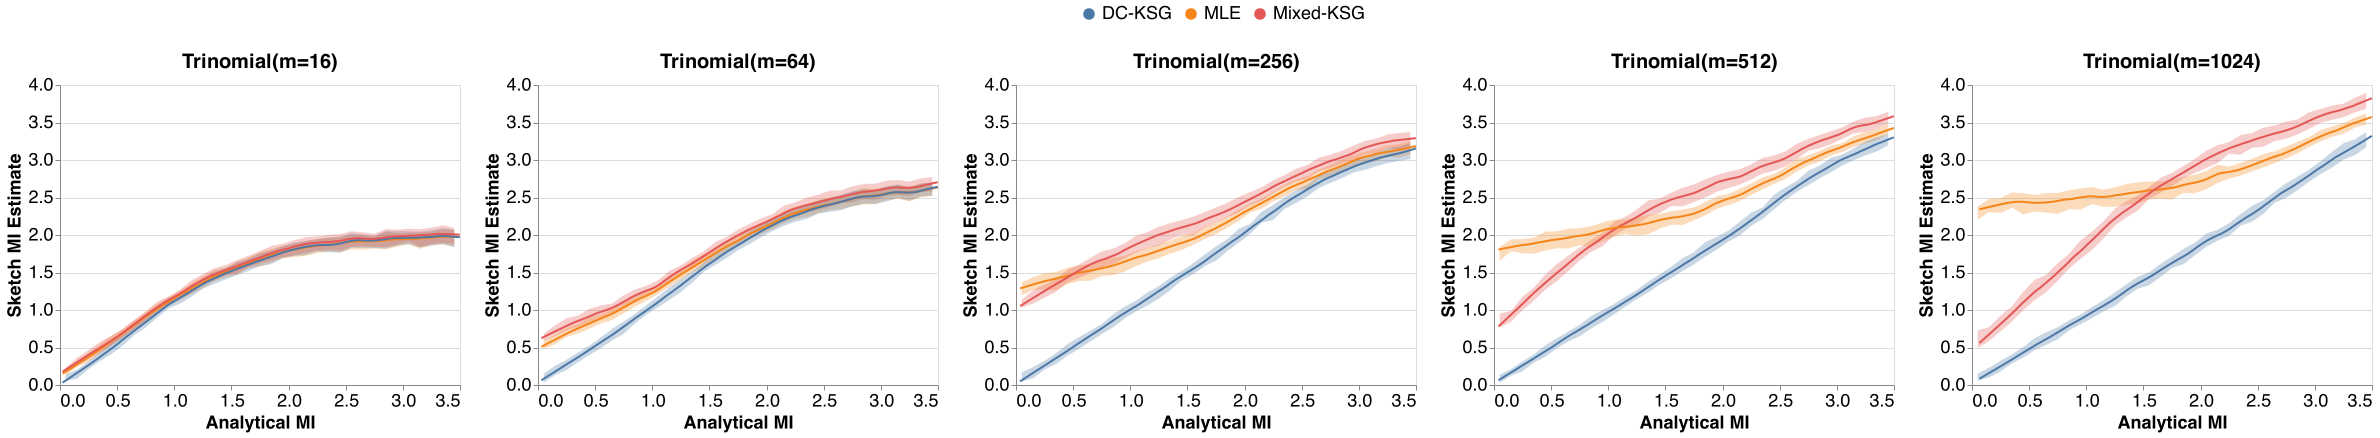

In [8]:
x=('mi_actual', 'Full-Join MI Estimate')
x=('mi_dist', 'Analytical MI')
y=('mi_est', 'Sketch MI Estimate')
plots = [
  loess_with_error_chart(
    df_mnl[(df_mnl.multinomial_n == n)&(df_mnl.sketch_n == '256')&(df_mnl['sketch_type']=='TUPSK')],
    x=x[0], x_title=x[1],
    y=y[0], y_title=y[1],
    color='estimator',
    chart_title=f'Trinomial(m={n})',
  ) for n in [16, 64, 256, 512, 1024]
]
save_alt(
  scatter_hconcat_chart(plots, legendX=1020, legendY=-80),
  filename=f'{figures_path}/mnl_sketch-size=128_true-mi-x-sk-mi_mult-m=16-to-1024.pdf'
)

WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.
WARN Channel tooltip should not be used with "binned" bin.


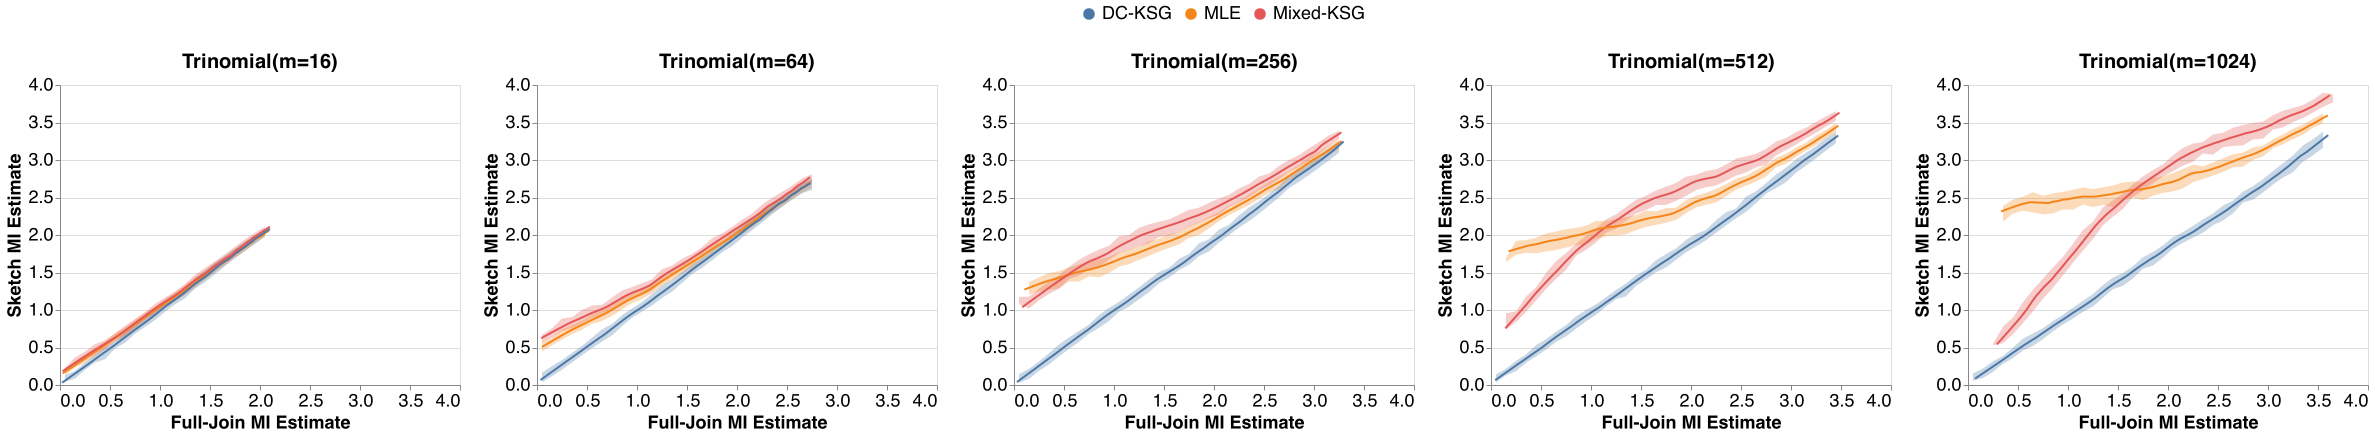

In [9]:
x=('mi_actual', 'Full-Join MI Estimate')
y=('mi_est', 'Sketch MI Estimate')
plots = [
  loess_with_error_chart(
    df_mnl[(df_mnl.multinomial_n == n)&(df_mnl.sketch_n == '256')&(df_mnl['sketch_type']=='TUPSK')],
    x=x[0], x_title=x[1],
    y=y[0], y_title=y[1],
    color='estimator',
    chart_title=f'Trinomial(m={n})',
  ) for n in [16, 64, 256, 512, 1024]
]
save_alt(
  scatter_hconcat_chart(plots, legendX=1020, legendY=-80),
  filename=f'{figures_path}/mnl_sketch-size=128_fulljoin-mi-x-sk-mi_mult-m=16-to-1024.pdf'
)

## Experiments using Real Data

In [10]:
def scatterplot_by_joinsize(df, df_filter, n_values=[128, 256, 512, 768], height=130, color='estimator'):
  x=('mi_actual', 'Full-Join')
  y=('mi_est', 'Sketch')
  return [
    scatter_alt(
      df[df_filter & (df.join_size_sketch > n)],
      x=x[0], x_title=x[1],
      y=y[0], y_title=y[1],
      color=color,
      chart_title=f'Sketch Join Size > {n}',
      height=height,
    ) for n in n_values
  ]

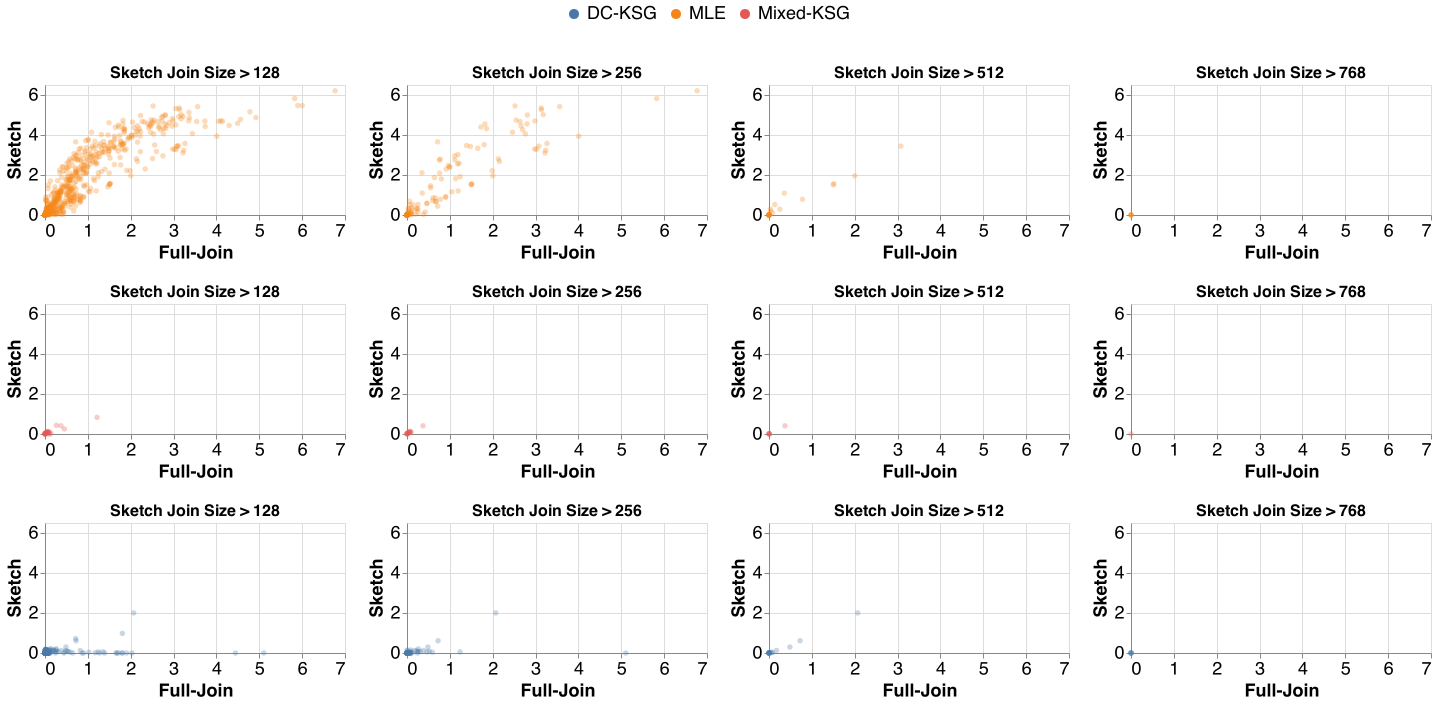

In [11]:
filter_wbf_dcksg    = df_wbf.estimator == 'DC-KSG'
filter_wbf_mle      = df_wbf.estimator == 'MLE'
filter_wbf_mixedksg = df_wbf.estimator == 'Mixed-KSG'
filter_tupsk1024    = (df_wbf.sketch_type == 'TUPSK')&(df_wbf.sketch_n == '1024')

plots1 = scatterplot_by_joinsize(df_wbf, (filter_wbf_mle & filter_tupsk1024))
chart1 = scatter_hconcat_chart(plots1, legendX=600, legendY=-70)

plots2 = scatterplot_by_joinsize(df_wbf, (filter_wbf_mixedksg & filter_tupsk1024))
chart2 = scatter_hconcat_chart(plots2, legendX=600, legendY=-70)

plots3 = scatterplot_by_joinsize(df_wbf, (filter_wbf_dcksg & filter_tupsk1024))
chart3 = scatter_hconcat_chart(plots3, legendX=600, legendY=-70)

save_alt(
    vconcat_hplots(
        [plots1, plots2, plots3],
        vconcat_shared_y='shared', vconcat_shared_x='shared',
        hconcat_shared_y='shared', hconcat_shared_x='shared'
    ),
    filename=f'{figures_path}/wbf_mi-sketch_vs_mi-fulljoin.pdf'
)

In [12]:
from functools import reduce

def create_metrics_table(df, dataset_name, df_filters):
    df_metrics = metrics_table(df, 'mi_est', 'mi_actual', df_filters=df_filters)
    df_metrics = df_metrics.rename(columns={'Metric':'sketch_type'})
    df_metrics['dataset'] = dataset_name
    return df_metrics

def create_join_size_table(df, dataset_name, df_filters):
    filter_or_fn = lambda a, b: a | b
    filter = reduce(filter_or_fn, [f[0] for f in df_filters])
    df_size = df[filter][['join_size_sketch','sketch_type']] \
        .groupby(by='sketch_type').mean().reset_index()
    df_size['dataset'] = dataset_name
    return df_size

filter_join_size_sk_wbf = df_wbf['join_size_sketch'] > 100
filter_join_size_sk_nyc = df_nyc['join_size_sketch'] > 100

df_filters_wbf =[
  (filter_join_size_sk_wbf & (df_wbf.sketch_type == 'TUPSK') & (df_wbf.sketch_n == '1024'), 'TUPSK'),
  (filter_join_size_sk_wbf & (df_wbf.sketch_type == 'LV2SK') & (df_wbf.sketch_n == '1024'), 'LV2SK'),
  (filter_join_size_sk_wbf & (df_wbf.sketch_type == 'PRISK') & (df_wbf.sketch_n == '1024'), 'PRISK'),
]
df_filters_nyc =[
  ( filter_join_size_sk_nyc & (df_nyc.sketch_type == 'TUPSK') & (df_nyc.sketch_n == '1024'), 'TUPSK'),
  ( filter_join_size_sk_nyc & (df_nyc.sketch_type == 'LV2SK') & (df_nyc.sketch_n == '1024'), 'LV2SK'),
  ( filter_join_size_sk_nyc & (df_nyc.sketch_type == 'PRISK') & (df_nyc.sketch_n == '1024'), 'PRISK'),
]

df_metrics_wbf = create_metrics_table(df_wbf, 'WBF', df_filters_wbf)
df_metrics_nyc = create_metrics_table(df_nyc, 'NYC', df_filters_nyc)
df_join_size_wbf = create_join_size_table(df_wbf, 'WBF', df_filters_wbf)
df_join_size_nyc = create_join_size_table(df_nyc, 'NYC', df_filters_nyc)

df_metrics_sksize_nyc = pd.merge(left=df_join_size_nyc, right=df_metrics_nyc[['sketch_type','MSE','Var(a/b)','Spearman\'s R', '# records']], on='sketch_type')
df_metrics_sksize_wbf = pd.merge(left=df_join_size_wbf, right=df_metrics_wbf[['sketch_type','MSE','Var(a/b)','Spearman\'s R', '# records']], on='sketch_type')
df_metrics_sksize = pd.concat([df_metrics_sksize_wbf, df_metrics_sksize_nyc])
df_metrics_sksize[['dataset', 'sketch_type', 'join_size_sketch','Spearman\'s R','MSE']]

,dataset,sketch_type,join_size_sketch,Spearman's R,MSE
0,WBF,LV2SK,230.920,0.811,1.414
1,WBF,PRISK,231.084,0.793,1.356
2,WBF,TUPSK,185.274,0.865,0.932
0,NYC,LV2SK,231.221,0.400,1.745
1,NYC,PRISK,226.589,0.396,1.760
2,NYC,TUPSK,194.912,0.454,1.464


In [13]:
def to_latex_table(df_metrics_sksize) -> str:
    df_metrics_sksize = df_metrics_sksize.groupby(by=['dataset','sketch_type']).first()
    df_metrics_sksize = df_metrics_sksize[['join_size_sketch','Spearman\'s R','MSE']]
    df_metrics_sksize = df_metrics_sksize.rename(
        index={
            'sketch_type': 'Method',
        },
        columns={
            'join_size_sketch': 'Avg. Join Size',
            'sketch\_type': 'Method',
        })
    
    styler = df_metrics_sksize.style \
        .format(subset="Avg. Join Size", precision=1) \
        .format(subset="Spearman\'s R",  precision=2) \
        .format(subset="MSE",            precision=2) \
        .highlight_max(subset=('NYC','Spearman\'s R'), axis=None, props='bfseries: ;') \
        .highlight_max(subset=('WBF','Spearman\'s R'), axis=None, props='bfseries: ;') \
        .highlight_min(subset=('NYC','MSE'), axis=None, props='bfseries: ;') \
        .highlight_min(subset=('WBF','MSE'), axis=None, props='bfseries: ;')

    return styler.to_latex(hrules=True)

print(to_latex_table(df_metrics_sksize))

\begin{tabular}{llrrr}
\toprule
 &  & Avg. Join Size & Spearman's R & MSE \\
dataset & sketch_type &  &  &  \\
\midrule
\multirow[c]{3}{*}{NYC} & LV2SK & 231.2 & 0.40 & 1.75 \\
 & PRISK & 226.6 & 0.40 & 1.76 \\
 & TUPSK & 194.9 & \bfseries 0.45 & \bfseries 1.46 \\
\multirow[c]{3}{*}{WBF} & LV2SK & 230.9 & 0.81 & 1.41 \\
 & PRISK & 231.1 & 0.79 & 1.36 \\
 & TUPSK & 185.3 & \bfseries 0.86 & \bfseries 0.93 \\
\bottomrule
\end{tabular}

